# Assignment A6-1 Spam or No-Spam

## Development Environment

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.pipeline import make_pipeline
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

## Data

In [2]:
# read data from csv file
data = pd.read_csv("/Users/pernillelorup/Desktop/Softwareudvikling/AI/MachineLearning/Week11/data/spam_source.csv")
data

,type,text
0,ham,Hope you are having a good week. Just checking in
1,ham,K..give back my thanks.
2,ham,Am also doing in cbe only. But have to pay.
3,spam,"complimentary 4 STAR Ibiza Holiday or £10,000 ..."
4,spam,okmail: Dear Dave this is your final notice to...
5,ham,Aiya we discuss later lar... Pick u up at 4 is...
6,ham,Are you this much buzy
7,ham,Please ask mummy to call father
8,spam,Marvel Mobile Play the official Ultimate Spide...
9,ham,"fyi I'm at usf now, swing by the room whenever"


In [3]:
# see the available topics 
list(data)

['type', 'text']

In [4]:
data.describe()

,type,text
count,5559,5559
unique,2,5156
top,ham,"Sorry, I'll call later"
freq,4812,30


In [5]:
data.groupby('type').describe()

text                                                               
     count unique                                                top freq
type                                                                     
ham   4812   4503                             Sorry, I'll call later   30
spam   747    653  Please call our customer service representativ...    4


## Step 3: Data Analysis and Preparation

In [6]:
y_data = data.iloc[:,:1].values
X_data = data.iloc[:,1:2].values

### Splitting the test and train data

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X_data,y_data,test_size = 0.20, random_state = 0)

y_test_raveled = y_test.ravel()
X_test_raveled = X_test.ravel()

X_train_raveled = X_train.ravel()
y_train_raveled = y_train.ravel()

### Vectorization
For the digitalization of the text we will use two algorithms:
- Count Vectorizer
- TF-IDF Vectorizer

### Method A with Count Vectorizer + TF-IDF Transformer

#### Count Vectorizer

We use it for tokenizing, removing the stop words, and bulding the sparse matrix.

In [8]:
# instantiate CountVectorizer()
cv = CountVectorizer()

# generate word counts for the words in our train documents
word_count = cv.fit_transform(X_train_raveled)

In [9]:
# see the mapping between words and assigned indices
cv.vocabulary_

{u'raining': 5589,
 u'todays': 6981,
 u'msgs': 4647,
 u'applyed': 1033,
 u'yellow': 7699,
 u'150ppermesssubscription': 320,
 u'four': 2987,
 u'woods': 7603,
 u'asian': 1099,
 u'hanging': 3343,
 u'6pm': 613,
 u'rocking': 5845,
 u'esplanade': 2671,
 u'looking': 4215,
 u'buddy': 1559,
 u'electricity': 2586,
 u'swan': 6680,
 u'scold': 5985,
 u'presents': 5425,
 u'swat': 6684,
 u'swap': 6682,
 u'lord': 4223,
 u'rp176781': 5873,
 u'sway': 6686,
 u'savings': 5965,
 u'sleepingwith': 6250,
 u'delhi': 2250,
 u'callin': 1632,
 u'61200': 584,
 u'sufficient': 6615,
 u'neway': 4788,
 u'hearin': 3404,
 u'screaming': 5999,
 u'courageous': 2054,
 u'disturb': 2377,
 u'prize': 5457,
 u'werebored': 7485,
 u'companies': 1933,
 u'wednesday': 7456,
 u'convenience': 2006,
 u'oooh': 4983,
 u'eh': 2571,
 u'shows': 6171,
 u'heading': 3394,
 u'9pm': 750,
 u'10k': 274,
 u'andrews': 970,
 u'force': 2960,
 u'specially': 6398,
 u'nigh': 4804,
 u'tired': 6948,
 u'panther': 5092,
 u'snuggles': 6312,
 u'clubmoby': 1871,

#### TF-IDF Transformer
__Term Frequency - Inverted Document Frequence__<br>

We assume that words, most seen in the corpus, appearing in many documents, may not be as informative, as some rare words, so we want to assess the importance of each word.

In [10]:
# Computing the IDFs
tfidf_transformer = TfidfTransformer(smooth_idf=True,use_idf=True)
tfidf_transformer.fit(word_count)#### TF-IDF Transformer

TfidfTransformer(norm=u'l2', smooth_idf=True, sublinear_tf=False,
         use_idf=True)

In [11]:
# to get an idea of how the IDF values look, we place them in a DataFrame, sort them, and then print them
df_wrd = pd.DataFrame(tfidf_transformer.idf_, index=cv.get_feature_names(),columns=["idf_weights"])
df_wrd.sort_values(by=['idf_weights'])

,idf_weights
to,2.196061
you,2.260549
the,2.678784
in,2.924777
and,2.943440
is,3.018394
me,3.070489
my,3.177634
for,3.187604
it,3.234792


In [12]:
# count matrix
count_vector=cv.transform(X_train_raveled)
count_vector

<4447x7764 sparse matrix of type '<type 'numpy.int64'>'
	with 58770 stored elements in Compressed Sparse Row format>

In [13]:
# tf-idf scores
tf_idf_vector=tfidf_transformer.transform(count_vector)
tf_idf_vector

<4447x7764 sparse matrix of type '<type 'numpy.float64'>'
	with 58770 stored elements in Compressed Sparse Row format>

#### Visualize the vectors

In [14]:
# compute TDIDF score per document
feature_names = cv.get_feature_names()

# get tfidf vector for the first document
first_document_vector = tf_idf_vector[0]
first_document_vector

<1x7764 sparse matrix of type '<type 'numpy.float64'>'
	with 2 stored elements in Compressed Sparse Row format>

In [15]:
# print the scores
df_doc = pd.DataFrame(first_document_vector.T.todense(), index=feature_names, columns=["tfidf"])
df_doc.sort_values(by=["tfidf"],ascending=False)

,tfidf
yup,0.824658
ok,0.565631
00,0.000000
peril,0.000000
perfume,0.000000
performed,0.000000
performance,0.000000
perform,0.000000
perfect,0.000000
perf,0.000000


The words at the top appear more offen, are less unique, and have the lowest weight.

## Train Model for Classification

### Using Bayes - Method A

In [16]:
# using multinomial Naive Bayes
classifier = MultinomialNB()

In [17]:
# connect the vectorizer to the multinomial classifier
model = make_pipeline(cv, classifier)

In [18]:
# train a model
model.fit(X_train_raveled, y_train_raveled)

Pipeline(memory=None,
     steps=[('countvectorizer', CountVectorizer(analyzer=u'word', binary=False, decode_error=u'strict',
        dtype=<type 'numpy.int64'>, encoding=u'utf-8', input=u'content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 1), preprocessor=None, stop_words=None,
        strip_accents=None, token_pattern=u'(?u)\\b\\w\\w+\\b',
        tokenizer=None, vocabulary=None)), ('multinomialnb', MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True))])

## Test the Model

In [19]:
# use the trained model to predict categories for the test data
y_predicted = model.predict(X_test_raveled)

# see the predicted labels
y_predicted

array(['ham', 'ham', 'ham', ..., 'ham', 'ham', 'ham'], dtype='|S4')

## Validate the Model

In [20]:
# measure the accuracy of the training
model_score = model.score(X_train_raveled, y_train_raveled)

In [21]:
# calculate the accuracy of the model with the test set
accuracy = accuracy_score(y_test_raveled, y_predicted)
accuracy

0.9901079136690647

In [22]:
# calculate confusion matrix to further evaluate the the accuracy of the prediction
cmat = confusion_matrix(y_test_raveled, y_predicted)
cmat

array([[979,   0],
       [ 11, 122]])

In [23]:
target_names = ['ham','spam']

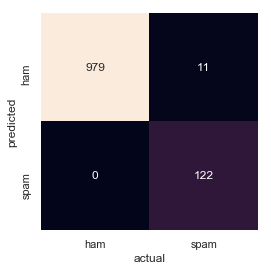

In [24]:
# visualize the confusion matrix by use of seaborn library
sns.set()
sns.heatmap(cmat.T, square=True, annot=True, fmt='d', cbar=False,
            xticklabels=target_names, yticklabels=target_names)
plt.xlabel('actual')
plt.ylabel('predicted');
plt.show()

### Pretty accurate results - only 11 spams got through as ham and 0 hams were detected as spam!

In [25]:
# print accuracy evaluation report
report = classification_report(y_test_raveled, y_predicted)
print(report)

              precision    recall  f1-score   support

         ham       0.99      1.00      0.99       979
        spam       1.00      0.92      0.96       133

   micro avg       0.99      0.99      0.99      1112
   macro avg       0.99      0.96      0.98      1112
weighted avg       0.99      0.99      0.99      1112

